In [ ]:
#1.Question 1:A retail store wants to identify customers who make frequent purchases. Given the dataset below, write a Python program to:
Group customers by their IDs.


Calculate the total purchase amount per customer.


Identify the top 3 customers with the highest purchase amounts.


Dataset:
data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}


Expected Output:
Total Purchases per Customer:
   Customer_ID  Purchase_Amount
0          101              520
1          102              600
2          103              480
3          104              300
4          105              400

Top 3 Frequent Customers:
   Customer_ID  Purchase_Amount
1          102              600
0          101              520
2          103              480


Total Purchases:
    Customer_ID  Purchase_Amount
0          101              520
1          102              600
2          103              480
3          104              300
4          105              400

Top 3 Customers:
    Customer_ID  Purchase_Amount
1          102              600
0          101              520
2          103              480
4          105              400
3          104              300


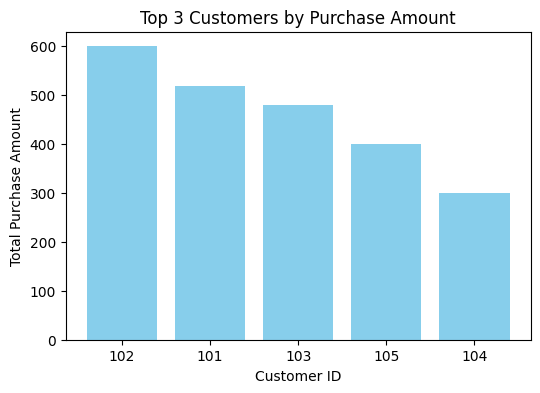

In [13]:
#1. Answer 
import pandas as pd
import matplotlib.pyplot as plt
data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}
#1. Create a Dataframe
df = pd.DataFrame(data)

#Group , then sum the purchase amount according to the group-Customer_ID
#grouped by customer ID 
#After groupby('CustomerID'), we don’t yet calculate anything , so Inside each group (per CustomerID), we take the PurchaseAmount column and sum it.
#this is not a DataFrame yet, it’s a Series with CustomerID
# So we add Series back into a DataFrame with .reset_index()
# Assign to total_purchase variable
total_purchase= df.groupby('Customer_ID')['Purchase_Amount'].sum().reset_index()

top_customers = total_purchase.sort_values(by='Purchase_Amount',ascending=False)
print("Total Purchases:\n", total_purchase)
print("\nTop 3 Customers:\n", top_customers)

#Visualization - Chart
plt.figure(figsize=(6,4))
plt.bar(top_customers['Customer_ID'].astype(str), top_customers['Purchase_Amount'], color='skyblue')
plt.title("Top 3 Customers by Purchase Amount")
plt.xlabel("Customer ID")
plt.ylabel("Total Purchase Amount")
plt.show()


In [ ]:
#2. Predicting House Prices with Linear Regression
A real estate company wants to predict house prices based on square footage. Write a Python program to:
Train a Linear Regression model.


Predict house prices for given test data.


Dataset:
data = {'Square_Feet': [1500, 2000, 2500, 3000, 3500],
        'Price': [300000, 400000, 500000, 600000, 700000]}

Test Data: [[1800], [2800]]
Expected Output:
Predicted Prices:
[360000. 560000.]



In [17]:
#2. Answer 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = {'Square_Feet': [1500, 2000, 2500, 3000, 3500],
        'Price': [300000, 400000, 500000, 600000, 700000]}

df = pd.DataFrame(data)
X = df[['Square_Feet']]
Y = df[['Price']]

regressor=LinearRegression()
regressor.fit(X,Y)

Test_Data = [[1800], [2800]]
Predict_Prices = regressor.predict(Test_Data)

print("Predict_Prices : ")
print(Predict_Prices)


Predict_Prices : 
[[360000.]
 [560000.]]


C:\Users\gssan\anaconda3\envs\aiml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#3:
Identifying Frequent Labels in a Dataset
A company wants to identify the top 3 most common categories in a dataset. Given the dataset below, write a Python program to:
Group the data by Category.


Count the total occurrences of each category.


Identify the top 3 most frequent categories.


Dataset:
data = {'Category': ['A', 'B', 'C', 'A', 'D', 'B', 'A', 'E', 'B', 'C', 'C', 'A'],
        'Value': [10, 15, 20, 30, 25, 18, 22, 40, 35, 50, 45, 15]}

Expected Output:

Total Occurrences per Category:
  Category  Count
0        A      4
1        B      3
2        C      3
3        D      1
4        E      1

Top 3 Frequent Categories:
  Category  Count
0        A      4
1        B      3
2        C      3


In [35]:
#3. Answer
import pandas as pd
import matplotlib.pyplot as plt

data = {'Category': ['A', 'B', 'C', 'A', 'D', 'B', 'A', 'E', 'B', 'C', 'C', 'A'],
        'Value': [10, 15, 20, 30, 25, 18, 22, 40, 35, 50, 45, 15]}

df = pd.DataFrame(data)

# Groupby Category  and .size() counts the number of rows in each group
# It returns a Series, not a DataFrame
# The values are the counts
# count column has no name. By default, it’s just 0
# reset_index() coverts to column
# count column is called 0, which is not descriptive, the name='Count' renames the column holding the counts.
Category_Occurences= df.groupby('Category').size().reset_index(name='Count')
Category_Occurences

top_3 = Category_Occurences.sort_values(by='Count',ascending=False)
print("Total Occurences:\n", Category_Occurences)
print("\nTop 3 Category:\n", top_3)




Total Occurences:
   Category  Count
0        A      4
1        B      3
2        C      3
3        D      1
4        E      1

Top 3 Category:
   Category  Count
0        A      4
1        B      3
2        C      3
3        D      1
4        E      1


In [ ]:
#4.
Predicting Missing Values Using Mean Imputation
A dataset contains missing values in the Age column. Write a Python program to:
Replace missing values with the mean of the column.


Display the updated DataFrame.


Dataset:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Age': [25, 30, None, 35, None]}

Expected Output:

Original Data:
     Name   Age
0  Alice  25.0
1    Bob  30.0
2 Charlie   NaN
3  David  35.0
4    Eve   NaN

Data after Imputation:
     Name   Age
0  Alice  25.0
1    Bob  30.0
2 Charlie  30.0
3  David  35.0
4    Eve  30.0


In [40]:
#4. Answer

#Mean imputation is a technique used to handle missing values in a dataset.
#When a column has missing values (NaN), we replace those missing values with the mean (average) of the non-missing values in that column.
#It is commonly used for numerical data.

import pandas as pd

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Age': [25, 30, None, 35, None]}

df=pd.DataFrame(data)
print(df)

#df['Column'].mean() → calculates the mean (ignores NaN by default)
meanAge=df['Age'].mean()
meanAge

#df['Column'].fillna(value) → replaces missing values with a specific value
df['Age'] = df['Age'].fillna(meanAge)
print("\nData after Imputation:")
print(df)

      Name   Age
0    Alice  25.0
1      Bob  30.0
2  Charlie   NaN
3    David  35.0
4      Eve   NaN

Data after Imputation:
      Name   Age
0    Alice  25.0
1      Bob  30.0
2  Charlie  30.0
3    David  35.0
4      Eve  30.0


In [ ]:
# 5: 
Implementing a Simple Linear Regression Model
You are given a dataset with Experience (years) and Salary ($). Write a Python program to:
Train a Linear Regression model.


Predict the salary for an individual with 6 years of experience.


Dataset:
import pandas as pd

data = {'Experience': [1, 2, 3, 4, 5], 
        'Salary': [30000, 35000, 40000, 45000, 50000]}
df = pd.DataFrame(data)

Expected Output (Example):

Predicted Salary for 6 years of experience: $55000


data = {'word_count': [100, 150, 200, 120, 180, 220], 
        'is_spam': ['ham', 'spam', 'spam', 'ham', 'spam', 'spam']}
df = pd.DataFrame(data)

Expected Output (Example):
Prediction for email with 200 words: Spam



In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = {'Experience': [1, 2, 3, 4, 5], 
        'Salary': [30000, 35000, 40000, 45000, 50000]}

df = pd.DataFrame(data)
X = df[['Experience']]
Y = df['Salary']

regressor=LinearRegression()
regressor.fit(X,Y)


Predict_Salary = regressor.predict([[6]])

print("Predicted Salary for 6 years of experience: $",Predict_Salary)

print("Slope (Coefficient):", regressor.coef_[0])
print("Intercept:", regressor.intercept_)

#I saw the output in the answer its perfect if i define like this
# print(f"Predicted Salary for 6 years of experience: ${predicted_salary[0]:.2f}") -> Can we discuss on this output 


Predicted Salary for 6 years of experience: $ [55000.]
Slope (Coefficient): 5000.0
Intercept: 25000.0


C:\Users\gssan\anaconda3\envs\aiml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
